In [9]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [10]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [11]:
#Download the data sets, shuffle them and transform each.
#the downloaded data sets are loaded to Dataloader.
#Dataloader - combines the data-sets and a sampler and provides single or multi-process iterators over the data-set
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [12]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print(color.BOLD + 'Knowing the Data set' + color.END)

Knowing the Data set


In [13]:
#checking out the shape of the images and labels
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


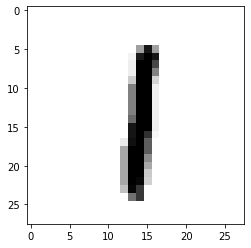

In [31]:
plt.imshow(images[2].numpy().squeeze(), cmap='gray_r');

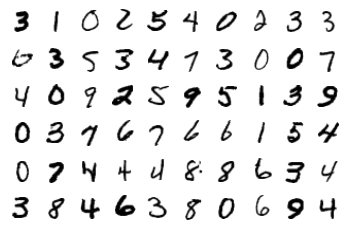

In [32]:
# will generate a grid of images in random order

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [16]:
print(color.BOLD + 'Building the NN' + color.END)

Building the NN


In [17]:
input_size = 784 #28x28=784
hidden_sizes = [128, 64]
output_size = 10 
# output layer is a linear layer with LogSoftmax activation.
# LogSoftmax function is the logarithm of a Softmax function
# Softmax converts a vector of numbers into a vector of probabilities (probability distribution)
# nn.Sequential wraps the layers in the network
# ReLU - a linear function that will output the input directly if it is positive, otherwise, it will output zero.

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [35]:
# NLLloss - to take log the probability value after softmax and add the probability value of the correct answer to the average

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print(loss)

tensor(0.1021, grad_fn=<NllLossBackward0>)


In [32]:
print(color.BOLD + 'Adjusting Weights' + color.END)

Adjusting Weights


In [20]:
# A NN learns by iterating multiple times over the available data.
# Learn refers to the adjustments of weights of the network to minimize the loss
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-7.4227e-04, -7.4227e-04, -7.4227e-04,  ..., -7.4227e-04,
         -7.4227e-04, -7.4227e-04],
        [-3.5715e-04, -3.5715e-04, -3.5715e-04,  ..., -3.5715e-04,
         -3.5715e-04, -3.5715e-04],
        [-2.2021e-03, -2.2021e-03, -2.2021e-03,  ..., -2.2021e-03,
         -2.2021e-03, -2.2021e-03],
        ...,
        [-1.9367e-04, -1.9367e-04, -1.9367e-04,  ..., -1.9367e-04,
         -1.9367e-04, -1.9367e-04],
        [ 6.4602e-04,  6.4602e-04,  6.4602e-04,  ...,  6.4602e-04,
          6.4602e-04,  6.4602e-04],
        [-9.0356e-05, -9.0356e-05, -9.0356e-05,  ..., -9.0355e-05,
         -9.0355e-05, -9.0355e-05]])


In [21]:
print(color.BOLD + 'Core training process' + color.END)

Core training process


In [22]:
# Neural Network iterates over the training set and updates the weights.
# torch.optim perform gradient descent and update the weights by back-propagation.
# We will be seeing a gradual decrease in training loss for each epoch.
# Epoch - number of times we iterate over the training set.
 
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6324353111800609
Epoch 1 - Training loss: 0.29064203114874326
Epoch 2 - Training loss: 0.22584274314693423
Epoch 3 - Training loss: 0.18381447421668817
Epoch 4 - Training loss: 0.1548348171974042

Training Time (in minutes) = 1.093542230129242


In [23]:
print(color.BOLD + 'Testing and Evaluation' + color.END)

Testing and Evaluation


In [24]:
#view_classify - is a utility function that shows the images and class probabilities that were predicted

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


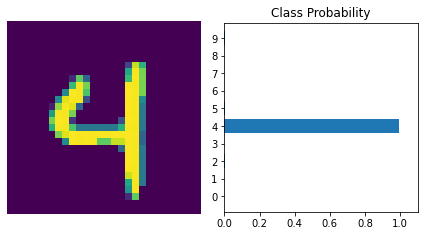

In [36]:
images, labels = next(iter(valloader))

img = images[2].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [37]:
# Iterate through the validation set using a for loop and calculate the total number of correct predictions
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.956
